## Supervised Learning Project:

### Project description:
Beta Bank customers are leaving: little by little, chipping away every month. 
The bankers figured out it was cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. 
We have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. 


### Table of contents:
* 1. [Data description](#Data-description:)
* 2. [Download and prepare the data](#Download-and-prepare-the-data:)
    * 2.1. ["Tenure" column](#%22Tenure%22-column:)
    * 2.2. [Feature Preparation](#2.2.-Feature-Preparation:)
* 3. [Examine the balance of classes](#3.-Examine-the-balance-of-classes:)
* 4. [Improve the quality of the model](#4.-Improve-the-quality-of-the-model:)
    * 4.1 [UpSample](#UpSample:)
    * 4.2 [SMOTE(Synthetic Minority Oversampling Technique):](#SMOTE-(Synthetic-Minority-Oversampling-Technique):)
* 5. [Perform the final testing](#5.-Perform-the-final-testing:)
* 6. [Conclusions](#Conclusions:)

### 1. Data description:
**Features:**

    * RowNumber — data string index
    * CustomerId — unique customer identifier
    * Surname — surname
    * CreditScore — credit score
    * Geography — country of residence
    * Gender — gender
    * Age — age
    * Tenure — period of maturation for a customer’s fixed deposit (years)
    * Balance — account balance
    * NumOfProducts — number of banking products used by the customer
    * HasCrCard — customer has a credit card
    * IsActiveMember — customer’s activeness
    * EstimatedSalary — estimated salary
    
**Target**

    * Exited — сustomer has left

### 2. Download and prepare the data:

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

In [2]:
try:
     df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
# Columns type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Columns genral info: 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [5]:
# Check for duplicated rows:
df[df.duplicated()==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
#Porcentage of NA in the Dataset
nan_pct = (df.isnull().sum(axis=0) / len(df))
print(nan_pct)

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64


**"Tenure" column has 9.09%, 909, missings values.**

#### 2.1. "Tenure" column:
I want to keep all the data, I don't know enough to try and find out what the missing values are.
I'm going to set the number 0 for all the missing values, assuming that if the data do not exist it's probably because it's 0, and also, I believe 0 would have the minimum impact on the data.

In [7]:
df = df.fillna(value = 0, axis = 'index')
df['Tenure'].describe()

count    10000.000000
mean         4.543400
std          3.111573
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

#### 2.2. Feature Preparation:
* The data set contain 13 features. 
* 3 of the features seem to be irrelevant: RowNumber, CustomerId, and Surname. 
* 4 of the features are categorical: Geography, Gender, HasCrCard, IsActiveMember
* 6 of the features are numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary
* Logistic regression and Decision tree determine the category using a formula consisting of numerical features, for that reason we are going to change the categorical features into numerical features in two different ways and create two different databases.

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

##### Change the categorical features into numerical features for LogisticRegression model:

In [9]:
data_reg = pd.get_dummies(df,drop_first =True)
data_reg.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,4.543400,3.111573,0.00,2.00,4.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


In [10]:
reg_target = data_reg['Exited']
reg_features = data_reg.drop('Exited', axis=1)
print(reg_target.shape)
print(reg_features.shape)

(10000,)
(10000, 11)


##### Change the categorical features into numerical features for RandomForestClassifier and DecisionTreeClassifier models:

In [11]:
encoder = OrdinalEncoder()
encoder.fit(df) 
data_tree = pd.DataFrame(encoder.transform(df) ,columns=df.columns)
data_tree.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,259.5846,96.496107,0.0,193.00,261.0,327.00,459.0
Geography,10000.0,0.7463,0.827529,0.0,0.00,0.0,1.00,2.0
Gender,10000.0,0.5457,0.497932,0.0,0.00,1.0,1.00,1.0
Age,10000.0,20.9206,10.482065,0.0,14.00,19.0,26.00,69.0
Tenure,10000.0,4.5434,3.111573,0.0,2.00,4.0,7.00,10.0
Balance,10000.0,2036.7881,2125.232536,0.0,0.00,1383.5,3882.25,6381.0
NumOfProducts,10000.0,0.5302,0.581654,0.0,0.00,0.0,1.00,3.0
HasCrCard,10000.0,0.7055,0.455840,0.0,0.00,1.0,1.00,1.0
IsActiveMember,10000.0,0.5151,0.499797,0.0,0.00,1.0,1.00,1.0
EstimatedSalary,10000.0,4998.6212,2886.711202,0.0,2498.75,4998.5,7498.25,9998.0


In [12]:
tree_target = data_tree['Exited']
tree_features = data_reg.drop('Exited', axis=1)
print(tree_target.shape)
print(tree_features.shape)

(10000,)
(10000, 11)


### 3. Examine the balance of classes:

In [13]:
# Examine the balance of the classes:
does_Exited = data_reg['Exited'].value_counts().reset_index()
does_Exited

,index,Exited
0,0,7963
1,1,2037


Text(0, 0.5, 'Frequency')

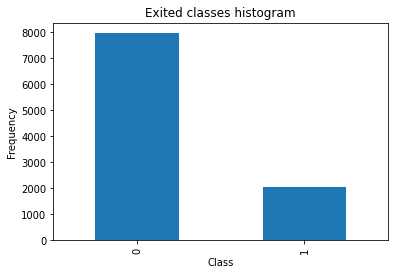

In [14]:
pd.value_counts(data_reg['Exited']).plot.bar()
plt.title('Exited classes histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

**The data is imbalanced. 
There are 79.6% of negative targets, and 20.4% of positive targets, its possible to run models on the data, but not all the predictions will show the majority group value (0) 
but the precision and recall would be low.**

* define function split_df, the function get features and target, and returning 6 sets:
    * features_train and target_train - 60% of original data
    * features_valid and target_valid - 20% or original data
    * features_test and target_test - 20% or original data

In [15]:
def split_df(features, target):
    print(len(features),len(features))
    features_train, features_remain, target_train, target_remain  = train_test_split(features,
                                                                               target,
                                                                               train_size = 0.6,
                                                                               random_state=12345) 

    features_valid, features_test, target_valid, target_test = train_test_split(features_remain,
                                                                                    target_remain, 
                                                                                    train_size=0.5, 
                                                                                    random_state=12345)

    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [16]:
# use the split_df function to split the Regression data:
reg_features_train,reg_features_valid,reg_features_test,reg_target_train,reg_target_valid,reg_target_test = split_df(reg_features, reg_target)

print("reg_features_train length", len(reg_features_train))
print("reg_features_valid length", len(reg_features_valid))
print("reg_features_test length", len(reg_features_test))
print("reg_target_train length", len(reg_target_train))
print("reg_target_valid length", len(reg_target_valid))
print("reg_target_test length", len(reg_target_test))

10000 10000
reg_features_train length 6000
reg_features_valid length 2000
reg_features_test length 2000
reg_target_train length 6000
reg_target_valid length 2000
reg_target_test length 2000


In [17]:
# Checking F1 score for the data as it is:
model1 = LogisticRegression(random_state=12345, solver='liblinear')
model1.fit(reg_features_train, reg_target_train)
prediction1 = model1.predict(reg_features_valid)
f1_score(reg_target_valid, prediction1)

0.08385744234800838

* we got an F1 score of 0.084, which is low as we suspected. 
* The recall and the precision are low  - we need to balance the data.  

In [18]:
# Checking F1 score after changing the hyperprameter- class_weight='balanced'
# The model fix the imbalance by assigning more weight to the manority group:
model2 = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model2.fit(reg_features_train, reg_target_train)
prediction2 = model2.predict(reg_features_valid)
f1_score(reg_target_valid, prediction2)

0.4879267277268943

* by changing the hyper parameter hyperparameter- class_weight='balanced' f1 score increases to 0.48, still low but better.

### 4. Improve the quality of the model:

#### LogisticRegression model:

In [19]:
# Examine the balance of the classes:
print('reg_target_train value count:')
print(reg_target_train.value_counts(normalize=True))

reg_target_train value count:
0    0.800667
1    0.199333
Name: Exited, dtype: float64


**The class difference is 4. In order to compare the classes sizes, either decrease class "0" by 4 or increase class 1 by 4**

In [20]:
repeat = 4

we are going two balance the data frame  by upsample and SMOTE(Synthetic Minority Oversampling Technique): 
* upsample enlarge the class 1 by repeating the number on
* SMOTE- make the model invent more observations in the spaces between the existing observation

##### UpSample:

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [22]:
reg_up_features_train, reg_up_target_train= upsample(reg_features_train, reg_target_train, repeat)
counter_up = Counter(reg_up_target_train)
print('upsample target for regression train set:', counter_up)

upsample target for regression train set: Counter({0: 4804, 1: 4784})


In [23]:
# see if F1 score increased by the upsample:
model3 = LogisticRegression(random_state=12345, solver='liblinear')
model3.fit(reg_up_features_train, reg_up_target_train)
prediction3 = model3.predict(reg_features_valid)
f1_score(reg_target_valid, prediction3)

0.4604081632653061

* F1 score after apsampeling the trin set is 0.46.
* By changing the hyperparameter above, the F1 score was 0.49- a better score.  
* Let's see how SMOTE will change the F1 score 

##### SMOTE (Synthetic Minority Oversampling Technique):

In [24]:
# Adjust the regression dataset with SMOTE:
oversample = SMOTE()
reg_smote_features_train, reg_smote_target_train = oversample.fit_resample(reg_features_train, reg_target_train)
counter_smot = Counter(reg_smote_target_train)
print('SMOTE target for regression train set size:', counter_smot)

SMOTE target for regression train set size: Counter({0: 4804, 1: 4804})


In [25]:
# see if F1 score increased by the SMOTE:
model4 = LogisticRegression(random_state=12345, solver='liblinear')
model4.fit(reg_smote_features_train, reg_smote_target_train)
prediction4 = model4.predict(reg_features_valid)
f1_score(reg_target_valid, prediction4)

0.46014790468364836

For LogisticRegression model:
* F1 score after apsampeling the trin set is 0.46.
* F1 score after using smote on the train set is 0.47, 
* By changing the hyperparameter above, the F1 score was 0.49 - which is the best score we got so.
0.49 is a low score. we are going to try the DecisionTreeClassifier model.

#### DecisionTreeClassifier model:

In [26]:
# use the split_df function to split the Tree data:
tree_features_train,tree_features_valid,tree_features_test,tree_target_train,tree_target_valid,tree_target_test = split_df(tree_features, tree_target)

print("tree_features_train length", len(tree_features_train))
print("tree_features_valid length", len(tree_features_valid))
print("tree_features_test length", len(tree_features_test))
print("tree_target_train length", len(tree_target_train))
print("tree_target_valid length", len(tree_target_valid))
print("tree_target_test length", len(tree_target_test))

10000 10000
tree_features_train length 6000
tree_features_valid length 2000
tree_features_test length 2000
tree_target_train length 6000
tree_target_valid length 2000
tree_target_test length 2000


##### changing the hyperprameter:

In [27]:
for depth in range(1, 7):
        model5 = DecisionTreeClassifier(random_state=12345, 
                                        class_weight='balanced',
                                         max_depth = depth)
        # < train the model >
        model5.fit(tree_features_train, tree_target_train) 
        predictions_valid = model5.predict(tree_features_valid) # get the model's predictions
        print("max depth: ", depth)
        print("F1 score:", f1_score(tree_target_valid, predictions_valid))

max depth:  1
F1 score: 0.4994903160040775
max depth:  2
F1 score: 0.541015625
max depth:  3
F1 score: 0.541015625
max depth:  4
F1 score: 0.5277777777777778
max depth:  5
F1 score: 0.5963791267305644
max depth:  6
F1 score: 0.5581835383159887


* For DecisionTreeClassifier with hyperparameter class_weight='balanced' and max depth of 5, we got F1 score 0.59, the best score so far
* I'm going to try RandomForestClassifier: 

#### RandomForestClassifier model:

##### UpSample:

In [28]:
tree_up_features_train, tree_up_target_train= upsample(tree_features_train, tree_target_train, repeat)
counter_up2 = Counter(tree_up_target_train)
print('upsample target for regression train set:', counter_up2)

# see if F1 score increased by the upsample:
for n_estimators in range(10, 15):
        model6 =  RandomForestClassifier(random_state=12345,
                                         n_estimators=n_estimators,
                                         max_depth= 7)
        model6.fit(tree_up_features_train, tree_up_target_train) 
        predictions_valid1 = model6.predict(tree_features_valid) # get the model's predictions
        print("n_estimators: ", n_estimators)
        print("F1 score:", f1_score(tree_target_valid, predictions_valid1))

upsample target for regression train set: Counter({0.0: 4804, 1.0: 4784})
n_estimators:  10
F1 score: 0.6054687499999999
n_estimators:  11
F1 score: 0.607843137254902
n_estimators:  12
F1 score: 0.6094674556213018
n_estimators:  13
F1 score: 0.6158415841584158
n_estimators:  14
F1 score: 0.6112759643916913


* The best F1 score- max depth of 7 with 13 estimators: 0.6158

##### SMOTE (Synthetic Minority Oversampling Technique):

In [29]:
# Adjust the regression dataset with SMOTE:
oversample2 = SMOTE()
tree_smote_features_train, tree_smote_target_train = oversample.fit_resample(tree_features_train, tree_target_train)
counter_smot2 = Counter(tree_smote_target_train)
print('SMOTE target for regression train set size:', counter_smot)

# see if F1 score increased by the SMOTE:
for n_estimators in range(10, 15):
        model7 =  RandomForestClassifier(random_state=12345,
                                         n_estimators=n_estimators,
                                         max_depth= 7)
        model7.fit(tree_smote_features_train, tree_smote_target_train) 
        predictions_valid2 = model7.predict(tree_features_valid) # get the model's predictions
        print("n_estimators: ", n_estimators)
        print("F1 score:", f1_score(tree_target_valid, predictions_valid2))

SMOTE target for regression train set size: Counter({0: 4804, 1: 4804})
n_estimators:  10
F1 score: 0.5597548518896834
n_estimators:  11
F1 score: 0.5595116988809765
n_estimators:  12
F1 score: 0.5544147843942505
n_estimators:  13
F1 score: 0.5640495867768593
n_estimators:  14
F1 score: 0.564366632337796


* The best F1 score- max depth of 7 with 14 estimators: 0.5643

In [30]:
for n_estimators in range(6, 15):
        model8 =  RandomForestClassifier(random_state=12345,
                                         class_weight='balanced',
                                         n_estimators=n_estimators,
                                         max_depth= 7)
        model8.fit(tree_features_train, tree_target_train) 
        predictions_valid3 = model8.predict(tree_features_valid) # get the model's predictions
        print("n_estimators: ", n_estimators)
        print("F1 score:", f1_score(tree_target_valid, predictions_valid3))

n_estimators:  6
F1 score: 0.6189473684210526
n_estimators:  7
F1 score: 0.6223628691983123
n_estimators:  8
F1 score: 0.6214807090719499
n_estimators:  9
F1 score: 0.6145833333333333
n_estimators:  10
F1 score: 0.6150670794633644
n_estimators:  11
F1 score: 0.6089676746611052
n_estimators:  12
F1 score: 0.621196222455404
n_estimators:  13
F1 score: 0.613277133825079
n_estimators:  14
F1 score: 0.6144200626959248


For RandomForestClassifier:
* after upsampling the train set with a max depth of 7 and 13 estimators, F1 score: 0.6158.
* After using smote on the train set with a max depth of 7 and 14 estimators, F1 score: 0.5717
* By changing the hyperparameter above, with a max depth of 7 and 7 estimators, the F1 score is 0.622 - which is the best score we got so far. 

We are going to run the model on the test set with RandomForestClassifier with a max depth of 7 and 7 estimators. 

### 5. Perform the final testing:

#### Perform the final testing:

In [31]:
model9 = RandomForestClassifier(random_state=12345,
                                         class_weight='balanced',
                                         n_estimators= 7,
                                         max_depth= 7)
model9.fit(tree_features_train, tree_target_train) # train model on training set
predictions_test = model9.predict(tree_features_test)
f1_score(tree_target_test, predictions_test)

0.600418410041841

###### **F1 Score of 0.600 for test set on RandomForestClassifier with 7 estimators and max_depth of 7**

#### measure of AUC-ROC metric and compare it with the F1:

In [32]:
probabilities_valid_tree = model7.predict_proba(tree_features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(tree_target_valid, probabilities_one_valid_tree)
print('auc_roc score for tree based models:')
print(auc_roc_tree)

auc_roc score for tree based models:
0.8058806005359336


In [33]:
probabilities_valid_reg = model4.predict_proba(reg_features_valid)
probabilities_one_valid_reg = probabilities_valid_reg[:, 1]
auc_roc_reg = roc_auc_score(reg_target_valid, probabilities_one_valid_reg)
print('auc_roc score for regression models:')
print(auc_roc_reg)

auc_roc score for regression models:
0.7262171922162606


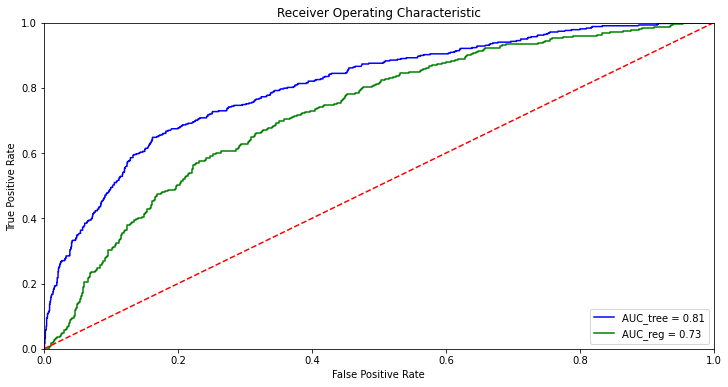

In [34]:

fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(tree_target_valid, probabilities_one_valid_tree)
fpr_reg, tpr_reg, threshold_reg = metrics.roc_curve(reg_target_valid, probabilities_one_valid_reg)

plt.figure(figsize=(12,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC_tree = %0.2f' % auc_roc_tree)
plt.plot(fpr_reg, tpr_reg, 'g', label = 'AUC_reg = %0.2f' % auc_roc_reg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Recall = the portion of true positive out of the sum of true positive and false negative
Precision = the portion of true positive out of the sum of true positive and false positive
F1 is the harmonic mean of Precision and Recall. 
0.599 means that  Recall and Precision harmonic mean is 0.599 which is relatively low.

TPR(TP/P)= True positive out of all True answers
FPR(FP/N)= False Positive out of the negative answer
AUC-ROC =  the area under the curve of the receiver operating characteristic, representation of TPR dependency of FPR. 
0.85 means that TPR has a high value and FPR has a low value for the tree-based models. 
for regression models we got an auc_roc score of 0.725- the TPR is lower for the OHA coding method. 

### Conclusions:

We need to predict whether a customer will leave the bank soon. 
We have the data on clients’ past behavior and termination of contracts with the bank.
In the project above two models were built and data adjustments were made in order to find the maximum possible F1 score. 

First, we change the categorical features to numerical features by OHA for the Lineare regression model and by the ordinal encoder for Random Forest Classifier model.
For Lineare regression we balnced the classes with upmodeling(F1= 0.46) of  and with SMOTHE(F1 =0.458)

Finally we tried Random Forest Classifier model with max_depth of 7 and 7 estimators(F1 = 0.622)
By running the Random Forest Classifier model with max_depth of 7 and 7 estimators we got an F1 score of  = 0.600
The AUC-ROC value for Random Forest Classifier is 0.85 and for linear regression is 0.73.
Those two metrics help assess the model and give totally different results. 
There are false predictions, quite a few of them, I would suggest finding more observations, and training another model. 

In this project, we create a model that can predict whether a customer will leave the bank based on:
CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfBanKProducts, HasCrrditCard, IsActiveMember, EstimatedSalary.
Our predictions have a Recall and Precision harmonic value of 0.662, and high TPR value, and a low FPR value for Random Forest Classifier model.
